### **LOGISTIC REGRESSION**

In [0]:
!pip install tensorflow-gpu==2.0 

     |████████████████████████████████| 380.8MB 93kB/s 
     |████████████████████████████████| 450kB 46.0MB/s 
     |████████████████████████████████| 3.8MB 27.7MB/s 
ERROR: tensorflow 1.15.0rc3 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.0 which is incompatible.
ERROR: tensorflow 1.15.0rc3 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


In [0]:
import numpy as np
import tensorflow as tf

In [0]:
tf.__version__

'2.0.0'

In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz

--2019-10-18 14:39:25--  https://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 922377711 (880M) [application/x-httpd-php]
Saving to: ‘SUSY.csv.gz’

SUSY.csv.gz         100%[===================>] 879.65M  45.3MB/s    in 20s     

2019-10-18 14:39:45 (44.8 MB/s) - ‘SUSY.csv.gz’ saved [922377711/922377711]



In [0]:
! gzip -d SUSY.csv.gz

In [0]:
tf.test.is_gpu_available()

True

In [0]:
import pandas as pd

In [0]:
susy = pd.read_csv("SUSY.csv")

In [0]:
susy.head()

,0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
0,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
1,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
2,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
3,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
4,0.0,0.456398,1.099371,1.512453,0.751772,0.638967,-0.742216,0.322601,1.321054,0.169502,0.359941,0.489256,0.416168,0.754829,0.303750,0.461067,0.345541,0.733242,0.186044


In [0]:
import numpy as np
X = susy.values[0:100000,1:].astype(np.float32)
y = susy.values[0:100000,0:1]

In [0]:
import matplotlib.pyplot as plt

(array([54025.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 45975.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

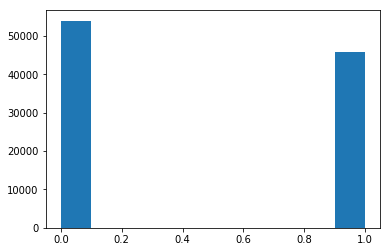

In [0]:
plt.hist(y)

In [0]:
train_susy = tf.data.Dataset.from_tensor_slices((X,y))

In [0]:
for xb,yb in train_susy.batch(4):
  print(xb.shape)
  print(yb)
  break



(4, 18)
tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]], shape=(4, 1), dtype=float64)


#### Dense Layer is one fully connected layer 

In [0]:
from tensorflow.keras.layers import Dense

In [0]:
from tensorflow.keras import Sequential

In [0]:
def build_model():
  net = Sequential()
  net.add(Dense(50,activation='sigmoid'))
  net.add(Dense(1,activation='sigmoid'))
  return net

In [0]:
net = build_model()

In [0]:
net

In [0]:
net(xb)

<tf.Tensor: id=67, shape=(4, 1), dtype=float32, numpy=
array([[0.48288763],
       [0.4621261 ],
       [0.509338  ],
       [0.503763  ]], dtype=float32)>

In [0]:
net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  950       
_________________________________________________________________
dense_1 (Dense)              multiple                  51        
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


In [0]:
net.variables

[<tf.Variable 'sequential/dense/kernel:0' shape=(18, 50) dtype=float32, numpy=
 array([[ 1.36690378e-01,  1.84391558e-01,  1.49867594e-01,
         -1.92964226e-01, -8.87597948e-02, -2.35344067e-01,
          5.73027134e-02, -1.59180969e-01,  2.38106787e-01,
          1.43323600e-01, -6.67316020e-02,  1.53206944e-01,
          1.95287496e-01, -2.31699347e-01,  6.77743852e-02,
         -6.72428608e-02,  1.08272940e-01,  4.52049077e-02,
         -2.88118720e-01, -1.41301155e-02, -9.02794749e-02,
          1.16476119e-01,  6.38006926e-02, -2.46565044e-02,
         -2.46559978e-02,  1.99683070e-01, -1.38365790e-01,
         -1.04065537e-01,  2.42963135e-01, -1.98123097e-01,
          1.15743607e-01,  4.16184664e-02,  8.55875909e-02,
         -1.91061124e-01, -1.34555265e-01,  2.37457216e-01,
         -1.31150559e-01,  1.69406921e-01,  1.80497766e-01,
          2.13199854e-03, -2.38218471e-01, -2.52531022e-01,
          2.82902539e-01, -1.55777171e-01, -1.42426729e-01,
         -2.02773765e

In [0]:
len(net.variables)

4

In [0]:
from tensorflow import losses , optimizers

In [0]:
from tqdm import tqdm_notebook

In [0]:
loss = losses.BinaryCrossentropy()
opt = optimizers.Adam()    # ADAM is a type of stochastic gradient descent 

In [0]:
loss_history = []
for epoch in tqdm_notebook(range(3)):
  for xb,yb in train_susy.shuffle(10000).batch(32):

    with tf.GradientTape() as tape:
      ypred = net(xb)
      l = loss(yb,ypred)
    
    g = tape.gradient(l,net.variables)
    opt.apply_gradients(zip(g,net.variables))

    loss_history.append(l.numpy())


In [0]:
loss_pd = pd.Series(loss_history).ewm(halflife=10)

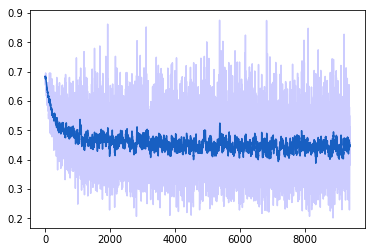

In [0]:
plt.plot(loss_pd.mean())
plt.plot(loss_history,'b',alpha=0.2)

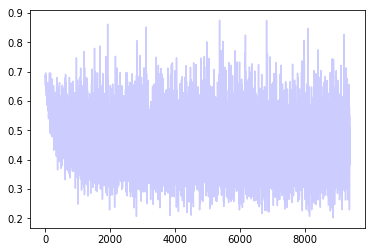

In [0]:
plt.plot(loss_history,'b',alpha=0.2)

In [0]:
Xtest = susy.values[100000:200000,1:].astype(np.float32)
ytest = susy.values[100000:200000,0:1]

In [0]:
test_susy = tf.data.Dataset.from_tensor_slices((Xtest,ytest.reshape(-1,1)))

In [0]:
from tensorflow.keras import metrics

In [0]:
acc = metrics.BinaryAccuracy()

for xb,yb in test_susy.batch(32):
  acc(yb,net(xb))

In [0]:
acc.result()

<tf.Tensor: id=1419585, shape=(), dtype=float32, numpy=0.52799404>

In [0]:
net  = Sequential()

In [0]:
net.compile(optimizer = opt , loss = loss , metrics = [ metrics.BinaryAccuracy(), metrics.AUC()])

In [0]:
history = net.fit(test_susy.shuffle(1000).batch(32), epochs = 3)

Epoch 1/3
      1/Unknown - 0s 68ms/step

ValueError: ignored

In [0]:
net.evaluate(test_susy)

     1/100000 [..............................] - ETA: 1:32:49

ValueError: ignored